<a href="https://colab.research.google.com/github/ALEKSEI1166/ALEKSEI1166/blob/main/%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC%D0%BD%D1%8B%D0%B9%20%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82%20%E2%84%96%203%20%22%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0%E2%80%94%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%81%D1%82%D0%B8%20%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D1%81%20%D1%86%D0%B5%D0%BB%D1%8C%D1%8E%20%D0%B2%D1%8B%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BF%D0%BE%D1%80%D1%82%D1%80%D0%B5%D1%82%D0%BE%D0%B2_%D0%B7%D0%B0%D0%B5%D0%BC%D1%89%D0%B8%D0%BA%D0%BE%D0%B2_%D0%BF%D0%BE_%D0%BA%D0%B0%D0%B6%D0%B4%D0%BE%D0%B9_%D0%B3%D1%80%D1%83%D0%BF%D0%BF%D0%B5_%D1%86%D0%B5%D0%BB%D0%B5%D0%B2%D0%BE%D0%B3%D0%BE_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B0_%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Аналитическая задача** — провести анализ данных с целью выделения портретов заемщиков по каждой группе целевого признака.

**Примерный план исследования**

Шаг 1. Загрузка данных;

Шаг 2. Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

Шаг 3. Добавление новых признаков:
- для каждого клиента рассчитайте его возраст на настоящий момент времени (на 2022 год);

Шаг 4. Исследовательский анализ данных
- в разрезе значений целевого признака (`Дисциплина клиентов без просрочки по кредиту`) исследовать распределения числовых и категориальных признаков;
- в разрезе значений целевого признака составить портреты клиентов платежной системы.

In [ ]:
#подключаю библиотеки

import pandas as pd #библиотека для анализа даннных
import numpy as np  #билиотека для работы с массивами
import matplotlib.pyplot as plt #билиотека для визуализации данных
import seaborn as sns #библиотека для создания статистических графиков
import datetime as dt #этот модуль позволяет управлять датами и временем


In [ ]:
#Шаг1 Загрузка данных (загружаю предложенный датасет)

df = pd.read_csv('dataset_segment_bank.csv')
'''загружаю данные из файла'csv' с помощью метода чтения файлов извне 'read_csv' и для анализа данных
   использую структуру 'ДатаФрейм'(df) библиотеки 'pandas' '''
df # вывожу на просмотр мой датасет

,Идентификатор,Дата рождения,Дисциплина клиентов без просрочки по кредиту,Количество переводов,Тип переводов,География переводов,География телефона,Сумма перевода,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода,"Канал, через который пришел клиент",Оператор связи,Пол
0,1493553,1981-05-08,BAD,17.0,2.0,77.0,77.0,371600.00,265000.0,21858.8235,371600.00,Стойка,NaN,Ж
1,8130758,1979-03-06,BAD,4.0,2.0,77.0,77.0,137574.00,135000.0,34393.5000,137574.00,Стойка,NaN,М
2,1782539,1957-04-29,BAD,3.0,2.0,77.0,77.0,175150.00,135000.0,58383.3333,175150.00,Стойка,МегаФон,М
3,12410720,1977-08-05,BAD,3.0,2.0,77.0,77.0,50250.00,50000.0,16750.0000,50250.00,Стойка,NaN,М
4,21309736,1978-08-15,GOOD,5.0,69.0,77.0,77.0,215920.14,135000.0,43184.0280,215920.14,Стойка,NaN,М
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50219,5593823,1962-12-08,MIDDLE,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,Партнер,МегаФон,Ж
50220,11667343,1958-10-26,MIDDLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Партнер,Вымпел-Коммуникации,М
50221,5947389,1977-10-28,BAD,NaN,2.0,77.0,77.0,NaN,NaN,NaN,NaN,Офис,Мобильные ТелеСистемы,Ж
50222,8937816,1982-10-09,BAD,NaN,44.0,77.0,77.0,NaN,NaN,NaN,NaN,Офис,NaN,М


In [ ]:
#смотрю типы данных:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50224 entries, 0 to 50223
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Идентификатор                                 50224 non-null  int64  
 1   Дата рождения                                 50224 non-null  object 
 2   Дисциплина клиентов без просрочки по кредиту  50223 non-null  object 
 3   Количество переводов                          50158 non-null  float64
 4   Тип переводов                                 50191 non-null  float64
 5   География переводов                           50191 non-null  float64
 6   География телефона                            48324 non-null  float64
 7   Сумма перевода                                50158 non-null  float64
 8   Максимальная сумма перевода                   50158 non-null  float64
 9   Средняя сумма перевода                        50158 non-null 

In [ ]:
#смотрю на описательную статистику числовых столбцов в DataFrame (метод 'describe()')
per = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
df.describe(percentiles=per)
'''Перцентили при анализе распределения данных позволяют оценить,
   какие доли данных находятся ниже или выше определенного значения'''
df

,Идентификатор,Дата рождения,Дисциплина клиентов без просрочки по кредиту,Количество переводов,Тип переводов,География переводов,География телефона,Сумма перевода,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода,"Канал, через который пришел клиент",Оператор связи,Пол
0,1493553,1981-05-08,BAD,17.0,2.0,77.0,77.0,371600.00,265000.0,21858.8235,371600.00,Стойка,NaN,Ж
1,8130758,1979-03-06,BAD,4.0,2.0,77.0,77.0,137574.00,135000.0,34393.5000,137574.00,Стойка,NaN,М
2,1782539,1957-04-29,BAD,3.0,2.0,77.0,77.0,175150.00,135000.0,58383.3333,175150.00,Стойка,МегаФон,М
3,12410720,1977-08-05,BAD,3.0,2.0,77.0,77.0,50250.00,50000.0,16750.0000,50250.00,Стойка,NaN,М
4,21309736,1978-08-15,GOOD,5.0,69.0,77.0,77.0,215920.14,135000.0,43184.0280,215920.14,Стойка,NaN,М
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50219,5593823,1962-12-08,MIDDLE,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,Партнер,МегаФон,Ж
50220,11667343,1958-10-26,MIDDLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Партнер,Вымпел-Коммуникации,М
50221,5947389,1977-10-28,BAD,NaN,2.0,77.0,77.0,NaN,NaN,NaN,NaN,Офис,Мобильные ТелеСистемы,Ж
50222,8937816,1982-10-09,BAD,NaN,44.0,77.0,77.0,NaN,NaN,NaN,NaN,Офис,NaN,М


In [ ]:
#вывожу столбцы и анализирую
df.columns

Index(['Идентификатор', 'Дата рождения',
       'Дисциплина клиентов без просрочки по кредиту', 'Количество переводов',
       'Тип переводов', 'География переводов', 'География телефона',
       'Сумма перевода', 'Максимальная сумма перевода',
       'Средняя сумма перевода', 'Полная сумма перевода',
       'Канал, через который пришел клиент', 'Оператор связи', 'Пол'],
      dtype='object')

In [ ]:
#много пропусков в географии телефонов и операторе связи
# 'дата рождения' - не в том формате (дату рождения не включаю, вижу ее только в контексте возрастных групп категориальным признаком)
#'тип переводов' - непонятно, видимо какая-то кодировка
#'география переводов' и 'география телефона' - очень похожи(проверить)
#'сумма перевода' и 'полная сумма перевода' совпадают?(проверить)
#'операторов связи' проверить на написание

In [ ]:
# Шаг 2. Первичная обработка данных (при необходимости):

#-скорректировать заголовки;
#-скорректировать типы признаков;
#-проверить наличие дублирующихся записей;
#-проверить наличие аномальных значений;
#-восстановить пропущенные значения;


In [ ]:
#заголовки корректировать не нужно.

In [ ]:
#скорректирую типы признаков
df = df.astype({'Дата рождения': 'datetime64'},
               errors='ignore'
               )
''' необходима корректировка типа данных - 'дата рождения' (должно быть в формате 'int').
    При получении ошибки - игнорировать '''
df

,Идентификатор,Дата рождения,Дисциплина клиентов без просрочки по кредиту,Количество переводов,Тип переводов,География переводов,География телефона,Сумма перевода,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода,"Канал, через который пришел клиент",Оператор связи,Пол
0,1493553,1981-05-08,BAD,17.0,2.0,77.0,77.0,371600.00,265000.0,21858.8235,371600.00,Стойка,NaN,Ж
1,8130758,1979-03-06,BAD,4.0,2.0,77.0,77.0,137574.00,135000.0,34393.5000,137574.00,Стойка,NaN,М
2,1782539,1957-04-29,BAD,3.0,2.0,77.0,77.0,175150.00,135000.0,58383.3333,175150.00,Стойка,МегаФон,М
3,12410720,1977-08-05,BAD,3.0,2.0,77.0,77.0,50250.00,50000.0,16750.0000,50250.00,Стойка,NaN,М
4,21309736,1978-08-15,GOOD,5.0,69.0,77.0,77.0,215920.14,135000.0,43184.0280,215920.14,Стойка,NaN,М
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50219,5593823,1962-12-08,MIDDLE,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,Партнер,МегаФон,Ж
50220,11667343,1958-10-26,MIDDLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Партнер,Вымпел-Коммуникации,М
50221,5947389,1977-10-28,BAD,NaN,2.0,77.0,77.0,NaN,NaN,NaN,NaN,Офис,Мобильные ТелеСистемы,Ж
50222,8937816,1982-10-09,BAD,NaN,44.0,77.0,77.0,NaN,NaN,NaN,NaN,Офис,NaN,М


In [ ]:
#'оператор связи' - правильность написания
df['Оператор связи'].replace(['МобильныеТелеСистемы'],'Мобильные ТелеСистемы',inplace=True) #фиксирую изменения
'''При помощи метода.replace () заменяю каждый экземпляр одного определенного
   символа новым указанной мною.
   (Это означает, что старая подстрока остается прежней,
   но создается новая копия - при этом весь старый текст заменяется новым текстом)'''
df

,Идентификатор,Дата рождения,Дисциплина клиентов без просрочки по кредиту,Количество переводов,Тип переводов,География переводов,География телефона,Сумма перевода,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода,"Канал, через который пришел клиент",Оператор связи,Пол
0,1493553,1981-05-08,BAD,17.0,2.0,77.0,77.0,371600.00,265000.0,21858.8235,371600.00,Стойка,NaN,Ж
1,8130758,1979-03-06,BAD,4.0,2.0,77.0,77.0,137574.00,135000.0,34393.5000,137574.00,Стойка,NaN,М
2,1782539,1957-04-29,BAD,3.0,2.0,77.0,77.0,175150.00,135000.0,58383.3333,175150.00,Стойка,МегаФон,М
3,12410720,1977-08-05,BAD,3.0,2.0,77.0,77.0,50250.00,50000.0,16750.0000,50250.00,Стойка,NaN,М
4,21309736,1978-08-15,GOOD,5.0,69.0,77.0,77.0,215920.14,135000.0,43184.0280,215920.14,Стойка,NaN,М
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50219,5593823,1962-12-08,MIDDLE,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,Партнер,МегаФон,Ж
50220,11667343,1958-10-26,MIDDLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Партнер,Вымпел-Коммуникации,М
50221,5947389,1977-10-28,BAD,NaN,2.0,77.0,77.0,NaN,NaN,NaN,NaN,Офис,Мобильные ТелеСистемы,Ж
50222,8937816,1982-10-09,BAD,NaN,44.0,77.0,77.0,NaN,NaN,NaN,NaN,Офис,NaN,М


In [ ]:
#проверяю наличие пропущенных значений:
# '''нужно удалить пропуски 'NaN' - земенив их на '0' '''
# df.fillna({'Количество переводов': 0,
#                'Тип переводов': 0,
#                'География переводов': 0,
#                'География телефона': 0,
#                 'Сумма перевода': 0,
#                 'Максимальная сумма перевода': 0,
#                 'Средняя сумма перевода': 0,
#                 'Полная сумма перевода': 0,
#                 'Оператор связи': 0,
#                 }, inplace=True)
# ''' Использую функцию fillna() для замены значений NaN в кадре данных pandas'''
# df # смотрю результат -готово.

In [ ]:
#проверяю наличие дубликатов
df.duplicated().sum()
# вывод: 575 дублей

575

In [ ]:
df.drop(columns='Идентификатор').duplicated().sum()
#Проверяю другим способом. В 'df' есть признак 'идентификатор' который обеспечивает уникальность.Будут ли дубли если его удалить?'''
#Вывод: 575 дублей

575

In [ ]:
#нужно удалить дубликаты
df.drop_duplicates(keep='first', inplace=True)
print(f'количество строк в ДатаФрейме {df.shape[0]}')
#Вывод: дубли удалены

количество строк в ДатаФрейме 49649


In [ ]:
#поиск и обработка аномалий:
df

,Идентификатор,Дата рождения,Дисциплина клиентов без просрочки по кредиту,Количество переводов,Тип переводов,География переводов,География телефона,Сумма перевода,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода,"Канал, через который пришел клиент",Оператор связи,Пол
0,1493553,1981-05-08,BAD,17.0,2.0,77.0,77.0,371600.00,265000.0,21858.8235,371600.00,Стойка,NaN,Ж
1,8130758,1979-03-06,BAD,4.0,2.0,77.0,77.0,137574.00,135000.0,34393.5000,137574.00,Стойка,NaN,М
2,1782539,1957-04-29,BAD,3.0,2.0,77.0,77.0,175150.00,135000.0,58383.3333,175150.00,Стойка,МегаФон,М
3,12410720,1977-08-05,BAD,3.0,2.0,77.0,77.0,50250.00,50000.0,16750.0000,50250.00,Стойка,NaN,М
4,21309736,1978-08-15,GOOD,5.0,69.0,77.0,77.0,215920.14,135000.0,43184.0280,215920.14,Стойка,NaN,М
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50219,5593823,1962-12-08,MIDDLE,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,Партнер,МегаФон,Ж
50220,11667343,1958-10-26,MIDDLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Партнер,Вымпел-Коммуникации,М
50221,5947389,1977-10-28,BAD,NaN,2.0,77.0,77.0,NaN,NaN,NaN,NaN,Офис,Мобильные ТелеСистемы,Ж
50222,8937816,1982-10-09,BAD,NaN,44.0,77.0,77.0,NaN,NaN,NaN,NaN,Офис,NaN,М


In [ ]:

#-удалим столбец 'Сумма перевода' т.к. он дублирует столбец 'полная сумма перводов'
#-удалим столбец 'География телефона', т.к. он совпадает со столбцом 'география переводов'
#-удалим столбец 'Оператор связи' т.к. он не несёт смысловой нагрузки
df.drop(columns='Сумма перевода', inplace=True)
df.drop(columns='География телефона', inplace=True)
df.drop(columns='Оператор связи', inplace=True)


In [ ]:
#Шаг 3. Добавление новых признаков:

#— для каждого клиента рассчитайте его возраст на настоящий момент времени (на 2022 год);
df['Возраст'] = 2022 - df['Дата рождения'].dt.year

#-удаляю столбец 'Дата рождения' т.к. я его заменил на столбец 'Возраст'
df.drop(columns='Дата рождения', inplace=True)
df


,Идентификатор,Дисциплина клиентов без просрочки по кредиту,Количество переводов,Тип переводов,География переводов,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода,"Канал, через который пришел клиент",Пол,Возраст
0,1493553,BAD,17.0,2.0,77.0,265000.0,21858.8235,371600.00,Стойка,Ж,41
1,8130758,BAD,4.0,2.0,77.0,135000.0,34393.5000,137574.00,Стойка,М,43
2,1782539,BAD,3.0,2.0,77.0,135000.0,58383.3333,175150.00,Стойка,М,65
3,12410720,BAD,3.0,2.0,77.0,50000.0,16750.0000,50250.00,Стойка,М,45
4,21309736,GOOD,5.0,69.0,77.0,135000.0,43184.0280,215920.14,Стойка,М,44
...,...,...,...,...,...,...,...,...,...,...,...
50219,5593823,MIDDLE,NaN,2.0,0.0,NaN,NaN,NaN,Партнер,Ж,60
50220,11667343,MIDDLE,NaN,NaN,NaN,NaN,NaN,NaN,Партнер,М,64
50221,5947389,BAD,NaN,2.0,77.0,NaN,NaN,NaN,Офис,Ж,45
50222,8937816,BAD,NaN,44.0,77.0,NaN,NaN,NaN,Офис,М,40


In [ ]:
#Поиск и обработка аномалий:
''' я проведу это с 'boxplot' (из библиотеки 'seaborn') и с использованием 'плотности распределения' '''

#выделяю категориальные признаки
cat_vars = ['Дисциплина клиентов без просрочки по кредиту', 'Тип переводов', 'География переводов',
            'Канал, через который пришел клиент', 'Пол']
for col in cat_vars:
  print(f'уникальные значения признака -- {col}.')
  print(df[col].unique())
  print('--'*30)

уникальные значения признака -- Дисциплина клиентов без просрочки по кредиту.
['BAD' 'GOOD' 'MIDDLE' nan]
------------------------------------------------------------
уникальные значения признака -- Тип переводов.
[ 2. 69.  1.  5.  8. 32.  0. 10. 26. 12.  6. 45. 11. 33. 16.  7. 37. 21.
 58. 19. 59. 44. 53. 28. 34.  3. 43. 29. 67. 17. 30. -1. 23. 55.  4. 61.
  9. 54. nan 49.]
------------------------------------------------------------
уникальные значения признака -- География переводов.
[7.70000e+01 7.10000e+01 7.40000e+01 3.40000e+01 5.90000e+01 2.30000e+01
 4.20000e+01 3.90000e+01 6.30000e+01 1.60000e+01 3.60000e+01 6.10000e+01
 2.00000e+00 7.00000e+00 4.80000e+01 6.40000e+01 8.90000e+01 5.60000e+01
 6.20000e+01 6.60000e+01 7.30000e+01 4.30000e+01 3.30000e+01 0.00000e+00
 5.40000e+01 3.50000e+01 1.30000e+01 1.80000e+01 5.20000e+01 7.60000e+01
 5.50000e+01 6.90000e+01 7.80000e+01 2.60000e+01 3.00000e+01 6.80000e+01
 4.40000e+01 6.70000e+01 3.10000e+01 2.10000e+01 5.80000e+01 7.20000e+

In [ ]:
#обработка 'типов переводов'
df['Тип переводов'].value_counts()
#ВЫвод: часть типов переводов не востребованы (< 139)

 2.0     18673
 5.0     13778
 69.0     6527
 6.0      2542
 8.0      1991
 1.0      1633
 10.0     1549
 0.0       739
 12.0      468
 26.0      289
 32.0      253
 16.0      248
 37.0      220
 11.0      194
 45.0      157
 7.0       139
 44.0       62
 58.0       45
 3.0        30
 21.0       14
 28.0       14
 33.0        7
 29.0        6
 4.0         5
 23.0        5
 19.0        5
 17.0        3
 55.0        3
 54.0        3
 34.0        2
 53.0        2
 59.0        2
 61.0        2
 43.0        1
 67.0        1
 30.0        1
-1.0         1
 9.0         1
 49.0        1
Name: Тип переводов, dtype: int64

In [ ]:
#удаляю часть строк с невостребованными типами переводов
del_transfer = [49.0, 9.0, -1.0, 30.0, 67.0, 43.0, 61.0, 59.0, 53.0, 34.0, 54.0, 55.0, 17.0, 19.0, 23.0, 4.0, 29.0,
                33.0, 28.0, 21.0, 3.0, 58.0, 44.0]
df = df[df['Тип переводов'].isin(del_transfer) == False]
df['Тип переводов'].value_counts()

2.0     18673
5.0     13778
69.0     6527
6.0      2542
8.0      1991
1.0      1633
10.0     1549
0.0       739
12.0      468
26.0      289
32.0      253
16.0      248
37.0      220
11.0      194
45.0      157
7.0       139
Name: Тип переводов, dtype: int64

In [ ]:
#обработка 'географии переводов'
df['География переводов'].value_counts()

77.0        19083
78.0         4129
61.0         2330
23.0         2110
66.0         1499
            ...  
75.0            2
498001.0        2
6.0             1
20.0            1
19.0            1
Name: География переводов, Length: 74, dtype: int64

In [ ]:
#обработка 'географии переводов'
#определяю аномальные значения
df[df['География переводов'] > 200]

,Идентификатор,Дисциплина клиентов без просрочки по кредиту,Количество переводов,Тип переводов,География переводов,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода,"Канал, через который пришел клиент",Пол,Возраст
769,2682337,MIDDLE,3.0,2.0,498002.0,59000.00,19767.8166,59303.45,Офис,Ж,35
15690,10568823,BAD,3.0,2.0,498002.0,440000.00,146720.6666,440162.00,Партнер,М,41
22371,12253054,GOOD,12.0,2.0,498002.0,74212.25,17959.3541,215512.25,Офис,Ж,52
28308,7390416,MIDDLE,7.0,2.0,498001.0,155000.00,27228.5714,190600.00,Партнер,Ж,52
33697,3651661,MIDDLE,10.0,2.0,498001.0,80275.51,12174.5510,121745.51,Партнер,М,64


In [ ]:
#убираю аномалии из 'географии переводов'
df = df[~(df['География переводов'] > 200)]
df['География переводов'].value_counts().tail(30)
#ВЫвод: часть типов переводов не востребованы (< 115)

68.0    115
31.0     98
21.0     93
60.0     92
12.0     66
86.0     25
24.0     16
46.0     15
45.0     14
1.0      13
7.0      12
5.0      10
89.0     10
29.0      9
15.0      8
8.0       6
9.0       6
25.0      5
32.0      4
11.0      4
57.0      3
65.0      3
38.0      3
67.0      3
14.0      2
22.0      2
75.0      2
6.0       1
20.0      1
19.0      1
Name: География переводов, dtype: int64

In [ ]:
#удаляю часть строк с невостребованными типами переводов
del_transfer = [19.0, 20.0, 6.0, 75.0, 22.0, 14.0, 67.0, 38.0, 65.0, 57.0, 11.0, 32.0, 25.0, 9.0, 8.0, 15.0, 29.0,
                89.0, 5.0, 7.0, 1.0, 45.0, 46.0, 24.0, 86.0, 12.0, 60.0, 21.0,31.0]
df = df[df['География переводов'].isin(del_transfer) == False]
df['География переводов'].value_counts()

77.0    19083
78.0     4129
61.0     2330
23.0     2110
66.0     1499
2.0      1294
63.0     1242
62.0     1198
26.0     1099
40.0     1087
64.0      991
74.0      975
47.0      903
56.0      758
10.0      757
34.0      742
52.0      704
71.0      702
16.0      625
59.0      611
42.0      565
73.0      521
36.0      380
54.0      370
39.0      333
13.0      308
43.0      278
37.0      260
58.0      258
18.0      252
55.0      251
69.0      237
76.0      219
35.0      216
33.0      210
53.0      198
48.0      192
44.0      187
72.0      179
0.0       178
51.0      172
30.0      150
68.0      115
Name: География переводов, dtype: int64

In [ ]:

'''Функция describe () возвращает некоторые общие статистические данные данных, включая среднее значение,
   стандартное отклонение, минимальный элемент, максимальный элемент.
   Это отличный способ получить моментальный снимок данных, с которыми я работаю, если набор данных
   относительно неизвестен. Это также  хороший способ быстро сравнить два отдельных набора похожих данных'''
df.describe()

,Идентификатор,Количество переводов,Тип переводов,География переводов,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода,Возраст
count,4.890100e+04,48837.000000,48868.000000,48868.000000,4.883700e+04,48837.000000,4.883700e+04,48901.000000
mean,1.097317e+07,15.889039,13.210854,60.789658,1.678627e+05,34758.514897,2.938250e+05,51.820474
std,5.764202e+06,29.810251,22.406386,21.798102,1.406880e+05,43756.567321,4.495279e+05,10.874426
min,1.400402e+06,1.000000,0.000000,0.000000,3.000000e+01,30.000000,3.000000e+01,31.000000
25%,6.385359e+06,4.000000,2.000000,51.000000,5.500000e+04,10256.521700,9.130000e+04,43.000000
50%,1.134029e+07,9.000000,5.000000,73.000000,1.200000e+05,20050.000000,1.854400e+05,51.000000
75%,1.444143e+07,17.000000,6.000000,77.000000,2.350000e+05,41954.210500,3.753342e+05,60.000000
max,3.006527e+07,2220.000000,69.000000,78.000000,2.150000e+06,644225.000000,1.953691e+07,82.000000


In [ ]:
df.head(10)

,Идентификатор,Дисциплина клиентов без просрочки по кредиту,Количество переводов,Тип переводов,География переводов,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода,"Канал, через который пришел клиент",Пол,Возраст
0,1493553,BAD,17.0,2.0,77.0,265000.0,21858.8235,371600.00,Стойка,Ж,41
1,8130758,BAD,4.0,2.0,77.0,135000.0,34393.5000,137574.00,Стойка,М,43
2,1782539,BAD,3.0,2.0,77.0,135000.0,58383.3333,175150.00,Стойка,М,65
3,12410720,BAD,3.0,2.0,77.0,50000.0,16750.0000,50250.00,Стойка,М,45
4,21309736,GOOD,5.0,69.0,77.0,135000.0,43184.0280,215920.14,Стойка,М,44
5,11343857,BAD,2.0,1.0,77.0,50000.0,25075.0000,50150.00,Стойка,Ж,39
6,5383517,BAD,4.0,2.0,77.0,200000.0,51037.5000,204150.00,Стойка,Ж,50
7,3882794,BAD,15.0,5.0,77.0,400000.0,35886.6666,538300.00,Стойка,Ж,43
8,7119607,BAD,4.0,2.0,77.0,135000.0,33833.7500,135335.00,Офис,Ж,53
9,7369177,BAD,9.0,2.0,77.0,38000.0,6923.3333,62310.00,Офис,Ж,58


In [ ]:
#Шаг 4. Исследовательский анализ данных:
#—в разрезе значений целевого признака (`Дисциплина клиентов без просрочки по кредиту`) исследовать распределения\
   #числовых и категориальных признаков;

In [ ]:
#для того, чтобы исследовать признаки аномалий - нужно построить 'ящик с усами'
'''для подсчёта значений нижнего и верхнего усов есть следующая функция:
     -на вход подается столбец датафрейма,
     -на выходе кортеж: первый элемент --нижний ус, второй элемент --верхний ус.'''
def calc_boxplot(df_col : pd.Series) -> tuple:
    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col.dropna()) <= hival, np.asarray(df_col.dropna()))
    wisklo = np.compress(np.asarray(df_col.dropna()) >= loval, np.asarray(df_col.dropna()))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)


In [ ]:
calc_boxplot(df['Количество переводов']) # нахожу границы нижнего и верхнего уса
#Вывод: нижняя граница - 1.0, верхняя граница - 36.0

(1.0, 36.0)

In [ ]:
# Разделz. признаки на две группы: категориальные (они же - качественные или дискретные) и числовых(они же интервальные или непрерывные)
df.columns #вывожу, смотрю и делю

Index(['Идентификатор', 'Дисциплина клиентов без просрочки по кредиту',
       'Количество переводов', 'Тип переводов', 'География переводов',
       'Максимальная сумма перевода', 'Средняя сумма перевода',
       'Полная сумма перевода', 'Канал, через который пришел клиент', 'Пол',
       'Возраст'],
      dtype='object')

In [ ]:
#числовые признаки: (могут принимать любые значения на интервале или шкале)
int_vars = ['Количество переводов',
            'Максимальная сумма перевода',
            'Средняя сумма перевода',
            'Полная сумма перевода',
            'Возраст']
#категориальные признаки: (имеют конечное или счетное множество значений)
cat_vars = ['Дисциплина клиентов без просрочки по кредиту',
            'Тип переводов',
            'География переводов',
            'Канал, через который пришел клиент',
            'Пол']

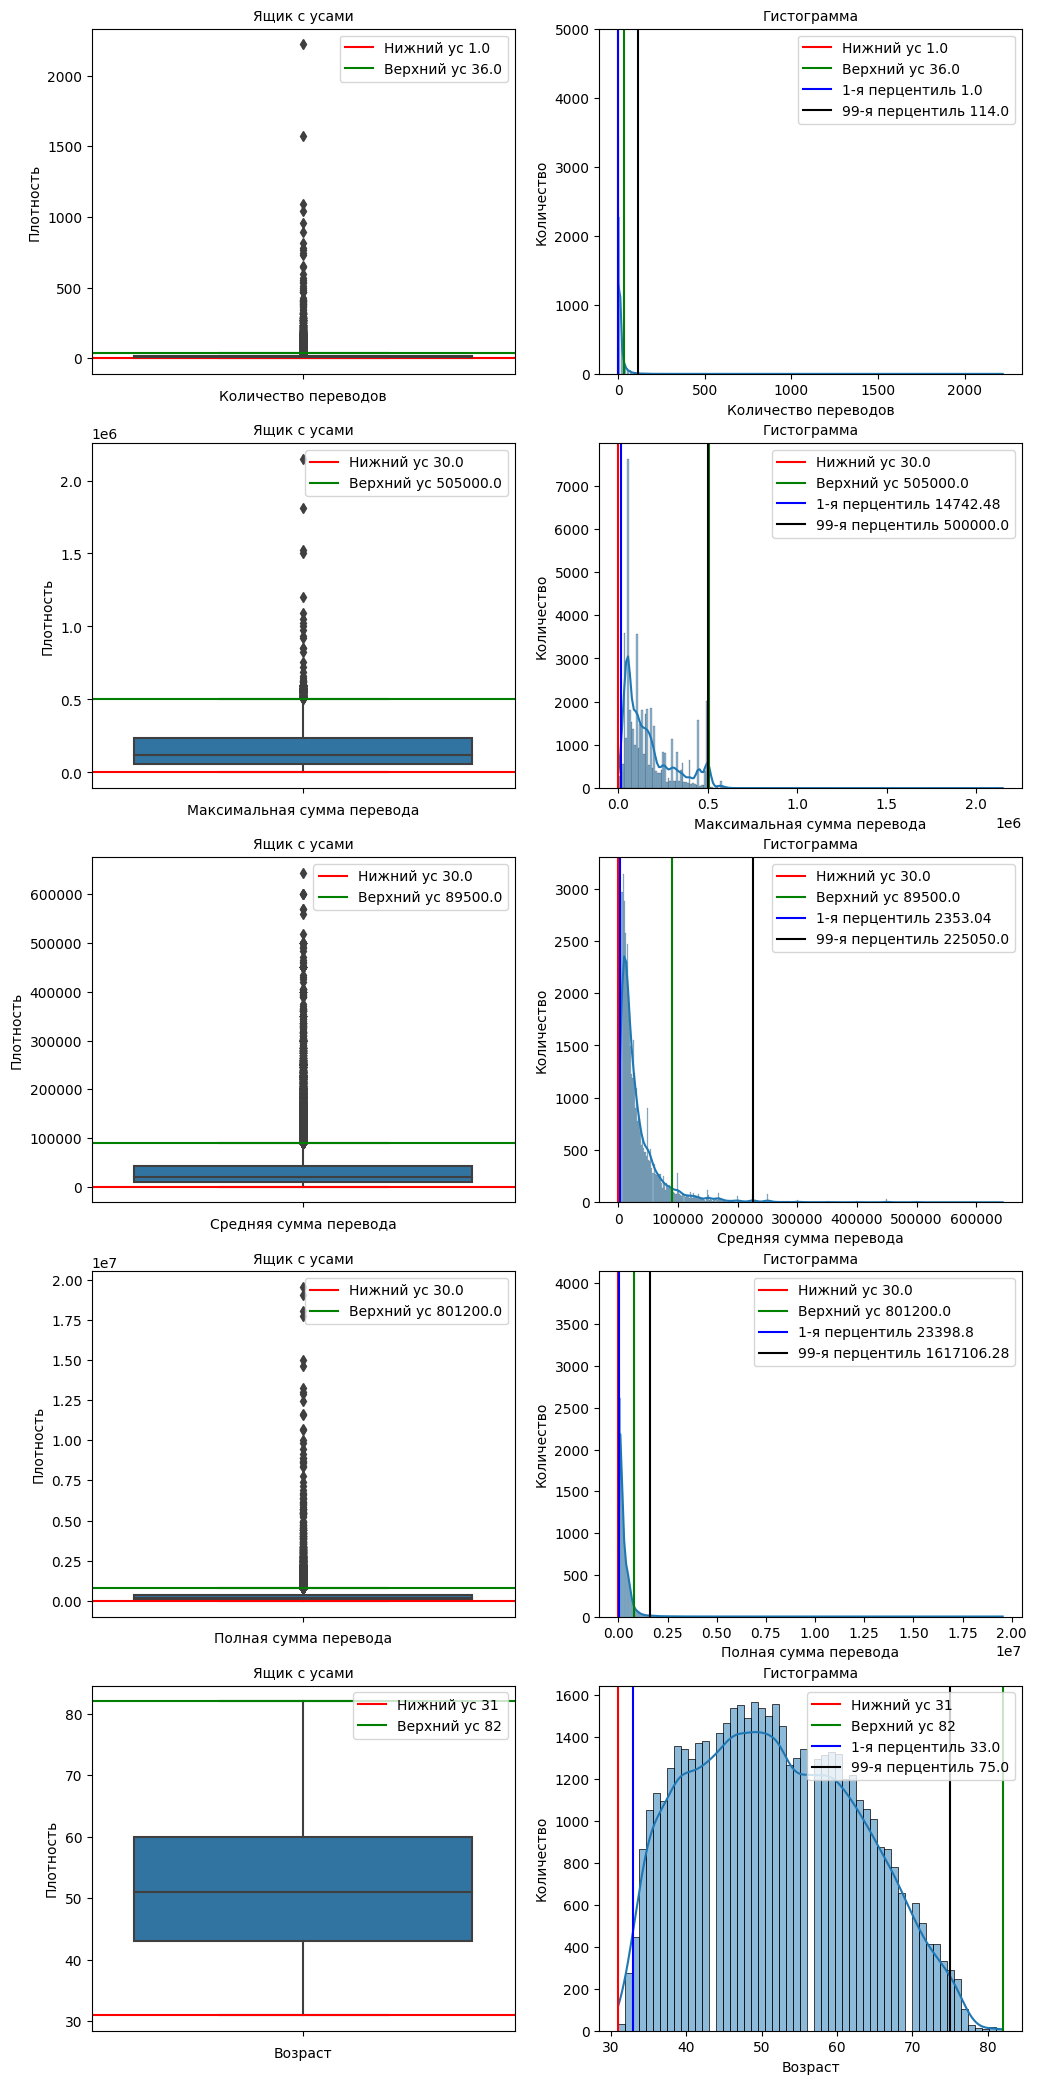

In [ ]:

#делаю весь процесс циклически:
fig, ax = plt.subplots(5, 2, #задаю сетку из 5 признаков на 2 столбца --10 графиков (т.е.будут 5 рядов по два столбца)(графики будут расположены рядом)
                      #  sharey = True, #параметр расположения графика по вертикали (отражает масштаб).Здесь он мешает.
                       figsize = (12, 26)) #задаю размер рисунка
i=1 # где 'i'-это 'index' (нумерация - начинаю с 1)
for index, col in enumerate(int_vars):#перебираю в цикле заголовки признаков 'col' и сразу же генерирую номер рисунка 'index'
    plt.subplot(5, 2, 2*index + 1)#задаю рисунок № 1 с нужным нечетным числом
    ax = sns.boxplot(y = df[col]) #рисую ящик
    plt.title('Ящик с усами', fontsize = 10)  #заголовок рисунка
    plt.ylabel('Плотность', fontsize = 10) #подпись оси ординат ('y')
    plt.xlabel(col, fontsize = 10) #подпись оси абцисс ('x')
    value_low, value_upper = calc_boxplot(df[col])
    plt.axhline(value_low, #значение координаты по оси 'y'-горизонтальная линия имеет координаты (0, value_low)
                color = 'red', #цвет линии
                label = 'Нижний ус {}'.format(np.round(value_low, 2)) #текст для легенды (отображаю значение уса, округленное до 2 знаков)
               )
    plt.axhline(value_upper, #значение координаты по оси 'x'-горизонтальная линия имеет координаты (0, value_upper)
               color = 'green',
               label = 'Верхний ус {}'.format(np.round(value_upper, 2)) #текст для легенды (отображаю значение уса, округленное до 2 знаков)
               )
    plt.legend(loc='upper right')#отображаю легенду, принудительно размещаяя её в правом верхнем углу

    #чётные рисунки -- рисую гистограммы и плотности
    plt.subplot(5, 2, 2*index + 2)
    ax = sns.histplot(df[col], #признак
                       kde = True) #для рисования функции плотности

    #ИЗМЕНЕНИЯ:
    #вначале рисую усы на плотности в виде вертикальных линий (метод 'axvline')

    value_low, value_upper = calc_boxplot(df[col])
    plt.axvline(value_low,  #значение координаты по оси ординат 'y'-горизонтальная линия имеет координаты (0, value_upper)
                color = 'red', #цвет линии
                label = 'Нижний ус {}'.format(np.round(value_low, 2)) #текст для легенды (отображаю значение уса, округленное до 2 знаков)
                )
    ''' теперь, я нанесу границы 'усов' на гистограмму с помощью метода 'axvline'(чтобы мне понимать -как это всё работает,
        смотреть на плотности и видеть, что именно я отсекаю, а именно 'убывающий хвостик') '''
    plt.axvline(value_upper, #значение координаты по оси 'x'-горизонтальная линия имеет координаты (0, value_upper)
                color = 'green', #цвет линии
                label = 'Верхний ус {}'.format(np.round(value_upper, 2)) #текст для легенды (отображаю значение уса, округленное до 2 знаков)
                )
    plt.legend(loc = 'upper right')#отображаю легенду, принудительно размещаяя её в правом верхнем углу


    #рисую квантили
    #вначале считаем 1 и 99 квантили
    '''можно нанести на гистограмму еще и перцинтили- очень удобно сравнивать их с границами 'усов'.Это 'комплексный
       анализ' на одном графике. Лучше использовать метод 'nanpercentile', т.к. он игнорирует пропуски'''
    per_1 = np.nanpercentile(df[col].dropna(), 1) #'dropna()'-это встроенный метод DataFrame, которая используется для
                                                  # удаления строк и столбцов со значениями Null/None/NaN из DataFrame.
                                                  # Метод возвращает новый DataFrame, а исходный DataFrame остается неизменным.
    per_99 = np.nanpercentile(df[col].dropna(), 99)

    ''' теперь, я нанесу границы 'усов' на гистограмму с помощью метода 'axvline'(чтобы мне понимать -как это всё работает,
        смотреть на плотности и видеть, что именно я отсекаю, а именно 'убывающий хвостик') '''
    plt.axvline(per_1, #значение координаты по оси ординат('y')--вертикальная линия имеет координаты (0, per_1)
                color = 'blue', #цвет линии
                label = '1-я перцентиль {}'.format(np.round(per_1, 2)) #текст для легенды--отображаю значение перцентиля, округленное до 2 знаков
               )
    plt.axvline(per_99,  #значение координаты по оси абцисс('x')--вертикальная линия имеет координаты (0, per_99)
                color = 'black', #цвет линии
                label = '99-я перцентиль {}'.format(np.round(per_99, 2)) #текст для легенды--отображаю значение перцентиля, округленное до 2 знаков
               )


    #для каждого признака рисую моду
    #plt.axvline(dict_value_mode[col],  #значение координаты по оси ординат('y')--вертикальная линия имеет координаты (0, dict_value_mode[col])
    #            color='green', #цвет линии
    #           label='Мода {}'.format(np.round(dict_value_mode[col], 2)) #текст для легенды--отображаю значение моды, округленное до 2 знаков
    #           )
    plt.legend(loc = 'upper right')#отображаю легенду, принудительно размещаяя её в правом верхнем углу
    #КОНЕЦ  ИЗМЕНЕНИЙ


    plt.title('Гистограмма', fontsize = 10) #заголовок рисунка
    plt.ylabel('Количество', fontsize = 10) #подпись оси ординат (у)
    plt.xlabel(col, fontsize = 10) #подпись оси абцисс (х)




In [ ]:
#per_1 = np.nanpercentile(df[col].dropna(), 1)
'''проверяю работает ли мой код по подсчету перцинтили.
   Вывод: работает'''
per_1

33.0

In [ ]:
#обрежу количество переводов по 99-му перцентилю
df[df['Количество переводов'] >= 114].shape[0]

495

In [ ]:
#обрежу DataSet по максимальной сумме перевода 'Верхний ус' --505000
df[df['Максимальная сумма перевода'] >= 505000] ['Дисциплина клиентов без просрочки по кредиту'].value_counts()


GOOD      259
MIDDLE     81
BAD        45
Name: Дисциплина клиентов без просрочки по кредиту, dtype: int64

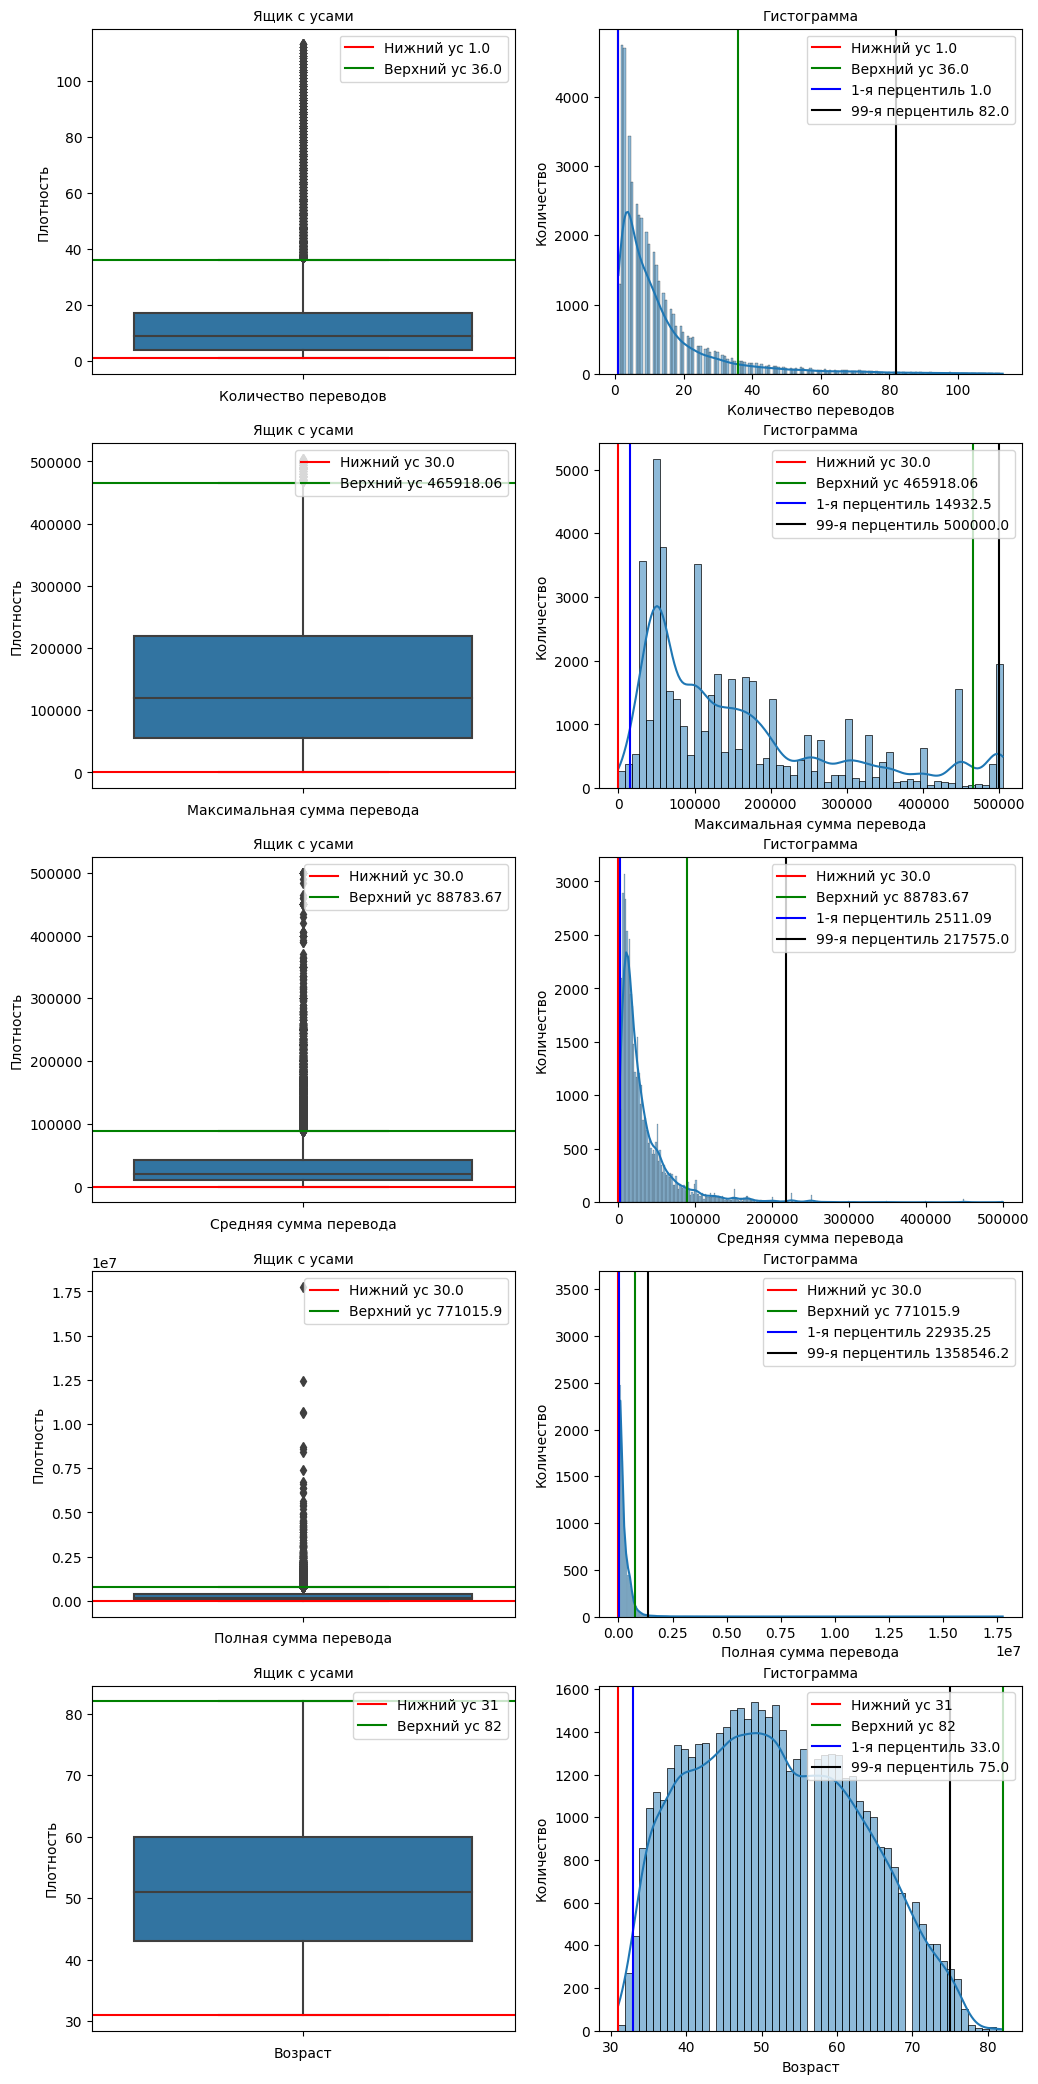

In [ ]:
#формирую три DataSet:
# 1. клиенты часто переводят
# 2. клиенты переводят большие суммы
# 3. остальные клиенты

df_big_use = df[df['Количество переводов'] >= 114]
df_big_amount = df[df['Максимальная сумма перевода'] >= 505000]
df_others = df[(df['Количество переводов'] < 114) & (df['Максимальная сумма перевода'] < 505000)]

#делаю весь процесс циклически(для всех признаков 'col' сразу):
fig, ax = plt.subplots(5, 2, #задаю сетку из 5 признаков на 2 --10 графиков
                       figsize = (12, 26)) #задаю размер рисунка
i=1 # где 'i'-это 'index' (нумерация - начинаю с 1)
for index, col in enumerate(int_vars, start = 0):#перебираю в цикле заголовки признаков 'col' и сразу же генерирую номер рисунка 'index'
    plt.subplot(5, 2, 2*index + 1)#задаю рисунок с нужным нечетным числом
    ax = sns.boxplot(y = df_others[col]) #рисую ящик
    plt.title('Ящик с усами', fontsize = 10)  #заголовок рисунка
    plt.ylabel('Плотность', fontsize = 10) #подпись оси ординат ('y')
    plt.xlabel(col, fontsize = 10) #подпись оси абцисс ('x')
    value_low, value_upper = calc_boxplot(df_others[col])
    plt.axhline(value_low, #значение координаты по оси 'y'-горизонтальная линия имеет координаты (0, value_low)
                color = 'red', #цвет линии
                label = 'Нижний ус {}'.format(np.round(value_low, 2)) #текст для легенды (отображаю значение уса, округленное до 2 знаков)
               )
    ''' теперь, я нанесу границы 'усов' на гистограмму с помощью метода 'axvline'(чтобы мне понимать -как это всё работает,
        смотреть на плотности и видеть, что именно я отсекаю, а именно 'убывающий хвостик') '''
    plt.axhline(value_upper, #значение координаты по оси 'x'-горизонтальная линия имеет координаты (0, value_upper)
               color = 'green',
               label = 'Верхний ус {}'.format(np.round(value_upper, 2)) #текст для легенды (отображаю значение уса, округленное до 2 знаков)
               )
    plt.legend(loc='upper right')#отображаю легенду, принудительно размещаяя её в правом верхнем углу

    #чётные рисунки -- рисую гистограммы и плотности
    plt.subplot(5, 2, 2*index + 2) #задаю рисунок № 2 (это чётные числа)
    ax = sns.histplot(df_others[col], #признак
                       kde = True) #'kdeplot' - метод визуализации (для рисования функции плотности).По умолчанию True.


    #ИЗМЕНЕНИЯ:
    #вначале рисую усы на плотности в виде вертикальных линий (метод 'axvline')

    value_low, value_upper = calc_boxplot(df_others[col])
    plt.axvline(value_low,  #значение координаты по оси ординат 'y'-горизонтальная линия имеет координаты (0, value_upper)
                color = 'red', #цвет линии
                label = 'Нижний ус {}'.format(np.round(value_low, 2)) #текст для легенды (отображаю значение уса, округленное до 2 знаков)
                )
    plt.axvline(value_upper, #значение координаты по оси 'x'-горизонтальная линия имеет координаты (0, value_upper)
                color = 'green', #цвет линии
                label = 'Верхний ус {}'.format(np.round(value_upper, 2)) #текст для легенды (отображаю значение уса, округленное до 2 знаков)
                )
    plt.legend(loc = 'upper right')#отображаю легенду, принудительно размещая её в правом верхнем углу


    #рисую квантили
    #вначале считаем 1 и 99 квантили
    '''можно нанести на гистограмму еще и перцинтили- очень удобно сравнивать их с границами 'усов'.Это 'комплексный
       анализ' на одном графике. Лучше использовать метод 'nanpercentile', т.к. он игнорирует пропуски'''
    per_1 = np.nanpercentile(df_others[col].dropna(), 1) #'dropna()'-это встроенный метод DataFrame, которая используется для
                                                  # удаления строк и столбцов со значениями Null/None/NaN из DataFrame.
                                                  # Метод возвращает новый DataFrame, а исходный DataFrame остается неизменным.
    per_99 = np.nanpercentile(df_others[col].dropna(), 99)
    plt.axvline(per_1, #значение координаты по оси ординат('y')--вертикальная линия имеет координаты (0, per_1)
                color = 'blue', #цвет линии
                label = '1-я перцентиль {}'.format(np.round(per_1, 2)) #текст для легенды--отображаю значение перцентиля, округленное до 2 знаков
               )
    plt.axvline(per_99,  #значение координаты по оси абцисс('x')--вертикальная линия имеет координаты (0, per_99)
                color = 'black', #цвет линии
                label = '99-я перцентиль {}'.format(np.round(per_99, 2)) #текст для легенды--отображаю значение перцентиля, округленное до 2 знаков
               )


    #для каждого признака рисую моду
    #plt.axvline(dict_value_mode[col],  #значение координаты по оси ординат('y')--вертикальная линия имеет координаты (0, dict_value_mode[col])
    #            color='green', #цвет линии
    #           label='Мода {}'.format(np.round(dict_value_mode[col], 2)) #текст для легенды--отображаю значение моды, округленное до 2 знаков
    #           )
    plt.legend(loc = 'upper right')#отображаю легенду, принудительно размещаяя её в правом верхнем углу
    #КОНЕЦ  ИЗМЕНЕНИЙ


    plt.title(f'Гистограмма', fontsize = 10) #заголовок рисунка
    plt.ylabel(f'Количество', fontsize = 10) #подпись оси ординат (у)
    plt.xlabel(col, fontsize = 10) #подпись оси абцисс (х)



In [ ]:
#посмотрим пропуски во всех трех группах:
df_big_amount.isna().sum()
      # Функция 'isna' проверяет каждую ячейку и возвращает True для ячеек с отсутствующим значением.\
      # Можно использовать функцию 'isna' вместе с 'sum', чтобы увидеть количество\
      # пропущенных значений в каждом столбце.

Идентификатор                                   0
Дисциплина клиентов без просрочки по кредиту    0
Количество переводов                            0
Тип переводов                                   0
География переводов                             0
Максимальная сумма перевода                     0
Средняя сумма перевода                          0
Полная сумма перевода                           0
Канал, через который пришел клиент              1
Пол                                             0
Возраст                                         0
dtype: int64

In [ ]:
df_big_use.isna().sum()

Идентификатор                                   0
Дисциплина клиентов без просрочки по кредиту    0
Количество переводов                            0
Тип переводов                                   0
География переводов                             0
Максимальная сумма перевода                     0
Средняя сумма перевода                          0
Полная сумма перевода                           0
Канал, через который пришел клиент              5
Пол                                             1
Возраст                                         0
dtype: int64

In [ ]:
df_others.isna().sum()

Идентификатор                                    0
Дисциплина клиентов без просрочки по кредиту     1
Количество переводов                             0
Тип переводов                                    0
География переводов                              0
Максимальная сумма перевода                      0
Средняя сумма перевода                           0
Полная сумма перевода                            0
Канал, через который пришел клиент              25
Пол                                              8
Возраст                                          0
dtype: int64

In [ ]:
#В 'Дисциплина клиентов без просрочки по кредиту' сеть пропуск, т.к. это целевой признак, то это пропуск необходимо удалить
df_others = df_others.loc[~(df_others['Дисциплина клиентов без просрочки по кредиту'].isna())]

In [ ]:
# В РАЗРЕЗЕ ЗНАЧЕНИЙ ЦЕЛЕВОГО ПРИЗНАКА СОСТАВИТЬ ПОРТРЕТЫ КЛИЕНТОВ ПЛАТЕЖНОЙ СИСТЕМЫ

#выборка по клиентам, которые часто переводят деньги:
df_big_use.groupby('Дисциплина клиентов без просрочки по кредиту')[int_vars].agg(['mean', 'median'])


Количество переводов         \
                                                             mean median   
Дисциплина клиентов без просрочки по кредиту                               
BAD                                                    212.000000  133.0   
GOOD                                                   190.553030  151.0   
MIDDLE                                                 208.492386  150.0   

                                             Максимальная сумма перевода  \
                                                                    mean   
Дисциплина клиентов без просрочки по кредиту                               
BAD                                                        205476.447059   
GOOD                                                       225702.336250   
MIDDLE                                                     223648.648223   

                                                          \
                                                  median   
Дисциплина клиентов без просрочки по кредиту               
BAD                                           147500.000   
GOOD                                          192181.335   
MIDDLE                                        182000.000   

                                             Средняя сумма перевода  \
                                                               mean   
Дисциплина клиентов без просрочки по кредиту                          
BAD                                                     9699.868903   
GOOD                                                    9209.188704   
MIDDLE                                                  8569.797748   

                                                          \
                                                  median   
Дисциплина клиентов без просрочки по кредиту               
BAD                                           8193.19980   
GOOD                                          6111.31255   
MIDDLE                                        5525.45170   

                                             Полная сумма перевода  \
                                                              mean   
Дисциплина клиентов без просрочки по кредиту                         
BAD                                                   1.821687e+06   
GOOD                                                  1.705499e+06   
MIDDLE                                                1.585660e+06   

                                                            Возраст         
                                                  median       mean median  
Дисциплина клиентов без просрочки по кредиту                                
BAD                                           1108131.00  50.823529   48.5  
GOOD                                           941200.00  52.882576   53.0  
MIDDLE                                         878771.63  51.604061   52.0

In [ ]:
#гипотезы проверяем по медианам, т.к. вид распределения далек от нормального, что видно на графиках

In [ ]:
#выборка по клиентам, которые переводят большие суммы:
df_big_amount.groupby('Дисциплина клиентов без просрочки по кредиту')[int_vars].agg(['mean', 'median'])

Количество переводов         \
                                                             mean median   
Дисциплина клиентов без просрочки по кредиту                               
BAD                                                     16.822222   10.0   
GOOD                                                    20.779923   11.0   
MIDDLE                                                  36.543210   19.0   

                                             Максимальная сумма перевода  \
                                                                    mean   
Дисциплина клиентов без просрочки по кредиту                               
BAD                                                        577019.061333   
GOOD                                                       595678.111274   
MIDDLE                                                     571271.825679   

                                                       Средняя сумма перевода  \
                                                median                   mean   
Дисциплина клиентов без просрочки по кредиту                                    
BAD                                           570000.0          118663.511924   
GOOD                                          570000.0          129577.451487   
MIDDLE                                        570000.0           82712.168217   

                                                          \
                                                  median   
Дисциплина клиентов без просрочки по кредиту               
BAD                                           77076.4444   
GOOD                                          93195.4545   
MIDDLE                                        52790.0000   

                                             Полная сумма перевода            \
                                                              mean    median   
Дисциплина клиентов без просрочки по кредиту                                   
BAD                                                   9.022433e+05  798401.0   
GOOD                                                  1.155846e+06  949300.0   
MIDDLE                                                1.105767e+06  908350.0   

                                                Возраст         
                                                   mean median  
Дисциплина клиентов без просрочки по кредиту                    
BAD                                           51.733333   51.0  
GOOD                                          52.888031   53.0  
MIDDLE                                        50.703704   51.0

In [ ]:
#выборка по остальным клиентам
df_others.groupby('Дисциплина клиентов без просрочки по кредиту')[int_vars].agg(['mean', 'median'])

Количество переводов         \
                                                             mean median   
Дисциплина клиентов без просрочки по кредиту                               
BAD                                                      9.988857    6.0   
GOOD                                                    14.556510    9.0   
MIDDLE                                                  15.530445   10.0   

                                             Максимальная сумма перевода  \
                                                                    mean   
Дисциплина клиентов без просрочки по кредиту                               
BAD                                                        150524.531587   
GOOD                                                       169851.482687   
MIDDLE                                                     161591.533873   

                                                       Средняя сумма перевода  \
                                                median                   mean   
Дисциплина клиентов без просрочки по кредиту                                    
BAD                                           100000.0           36896.746501   
GOOD                                          130000.0           35488.325147   
MIDDLE                                        115000.0           30325.672256   

                                                           \
                                                   median   
Дисциплина клиентов без просрочки по кредиту                
BAD                                           22934.72215   
GOOD                                          20696.19750   
MIDDLE                                        17538.94330   

                                             Полная сумма перевода            \
                                                              mean    median   
Дисциплина клиентов без просрочки по кредиту                                   
BAD                                                  218810.563774  137762.5   
GOOD                                                 288396.730958  195750.0   
MIDDLE                                               280632.053713  185006.5   

                                                Возраст         
                                                   mean median  
Дисциплина клиентов без просрочки по кредиту                    
BAD                                           49.305772   48.0  
GOOD                                          53.192748   53.0  
MIDDLE                                        50.792868   50.0

In [ ]:
cat_vars.remove('Дисциплина клиентов без просрочки по кредиту')

In [ ]:
#КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ
df_others.groupby('Дисциплина клиентов без просрочки по кредиту')[cat_vars].agg('count')

,Тип переводов,География переводов,"Канал, через который пришел клиент",Пол
Дисциплина клиентов без просрочки по кредиту,,,,
BAD,8974,8974,8971,8974
GOOD,25951,25951,25935,25945
MIDDLE,13040,13040,13034,13038


In [ ]:
df_others_canal = df_others.pivot_table(index = ['Дисциплина клиентов без просрочки по кредиту'],
                                        columns = 'Канал, через который пришел клиент',
                                        values = 'Идентификатор',
                                        aggfunc = 'count').fillna(0)
df_others_canal

"Канал, через который пришел клиент",Офис,Партнер,Стойка
Дисциплина клиентов без просрочки по кредиту,,,
BAD,3578,4526,867
GOOD,14320,9607,2008
MIDDLE,6201,5737,1096


In [ ]:
# напишу функцию
for col in cat_vars:
  display( df_others.pivot_table(index = ['Дисциплина клиентов без просрочки по кредиту'],
                                        columns = col,
                                        values = 'Идентификатор',
                                        aggfunc = 'count').fillna(0))

Тип переводов,0.0,1.0,2.0,5.0,6.0,7.0,8.0,10.0,11.0,12.0,16.0,26.0,32.0,37.0,45.0,69.0
Дисциплина клиентов без просрочки по кредиту,,,,,,,,,,,,,,,,
BAD,120,668,3646,1642,635,21,660,276,55,59,16,51,25,20,94,986
GOOD,387,536,9451,7502,1182,92,757,820,81,286,139,157,135,143,28,4255
MIDDLE,197,413,4944,4281,648,23,511,403,53,105,42,61,65,35,34,1225


География переводов,0.0,2.0,10.0,13.0,16.0,18.0,23.0,26.0,30.0,33.0,...,66.0,68.0,69.0,71.0,72.0,73.0,74.0,76.0,77.0,78.0
Дисциплина клиентов без просрочки по кредиту,,,,,,,,,,,,,,,,,,,,,
BAD,28,337,53,46,141,63,468,233,37,32,...,380,25,49,157,20,98,309,39,3441,513
GOOD,70,505,520,170,305,117,997,545,65,123,...,710,50,130,296,113,273,411,115,10078,2383
MIDDLE,74,446,165,91,173,66,620,298,48,53,...,392,39,55,238,44,139,249,63,5121,1117


"Канал, через который пришел клиент",Офис,Партнер,Стойка
Дисциплина клиентов без просрочки по кредиту,,,
BAD,3578,4526,867
GOOD,14320,9607,2008
MIDDLE,6201,5737,1096


Пол,Ж,М
Дисциплина клиентов без просрочки по кредиту,,
BAD,4364,4610
GOOD,13439,12506
MIDDLE,6639,6399


In [ ]:
# Наиболее наглядное отображение различий между плохими клиентами и хорошими  можно найти на таком признаке как \
 # 'Канал, через который пришел клиент'

In [ ]:
#посчитаю процентное соотношение каналов поступления клиентов:
#добавлю столбцы с процентами
df_others_canal['%_Офис'] = np.round(df_others_canal['Офис'] / df_others_canal['Офис'].sum(), 3)*100
df_others_canal['%_Партнер'] = np.round(df_others_canal['Партнер'] / df_others_canal['Партнер'].sum(), 3)*100
df_others_canal['%_Стойка'] = np.round(df_others_canal['Стойка'] / df_others_canal['Стойка'].sum(), 3)*100
df_others_canal

"Канал, через который пришел клиент",Офис,Партнер,Стойка,%_Офис,%_Партнер,%_Стойка
Дисциплина клиентов без просрочки по кредиту,,,,,,
BAD,3578,4526,867,14.8,22.8,21.8
GOOD,14320,9607,2008,59.4,48.3,50.6
MIDDLE,6201,5737,1096,25.7,28.9,27.6


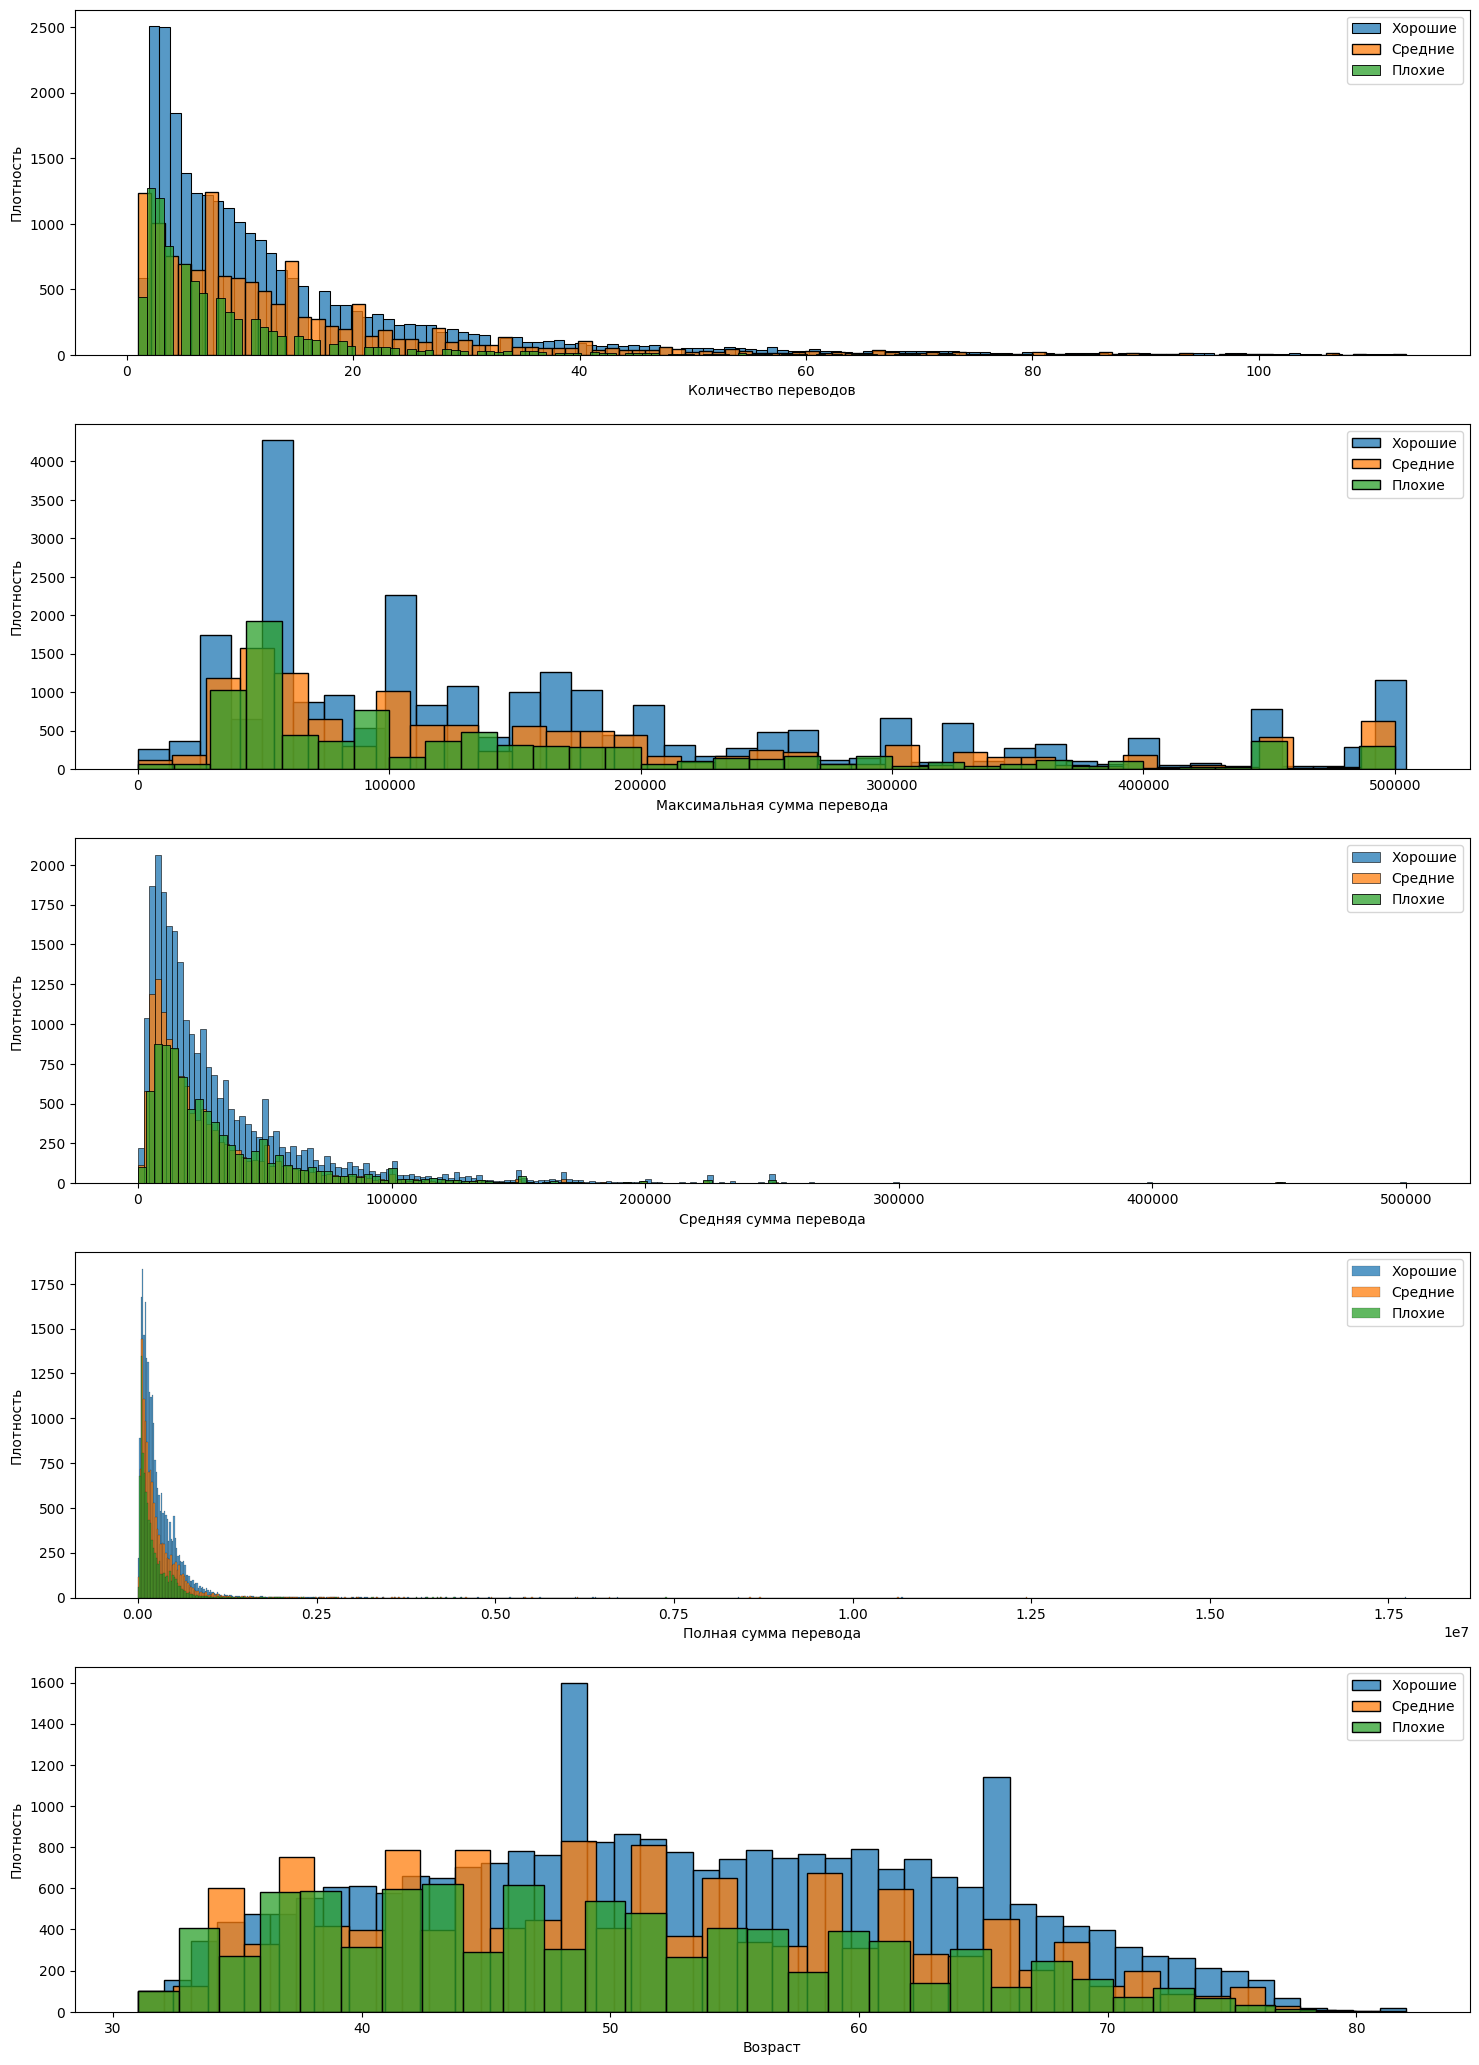

In [ ]:
fig, ax = plt.subplots(5, 1, #задаю сетку из 5 признаков на 2 --10 графиков
                       figsize = (18, 26)) #задаю размер рисунка
i=0 # где 'i'-это 'index' (нумерация - начинаю с 1)
for i, col in enumerate(int_vars):#перебираю в цикле заголовки признаков 'col' и сразу же генерирую номер рисунка 'index'
    plt.subplot(5, 1, i + 1)#задаю рисунок с нужным нечетным номером(нумерация начинаеися с единицы)
    ax = sns.histplot(df_others[df_others['Дисциплина клиентов без просрочки по кредиту'] == 'GOOD'][col], label = 'Хорошие')
    ax = sns.histplot(df_others[df_others['Дисциплина клиентов без просрочки по кредиту'] == 'MIDDLE'][col], label = 'Средние')
    ax = sns.histplot(df_others[df_others['Дисциплина клиентов без просрочки по кредиту'] == 'BAD'][col], label = 'Плохие')
    #plt.title('Гистограмма и плотность  для признака <<{}>>'. format(dict_to_rus[col]))  #заголовок рисунка
    plt.ylabel('Плотность') #подпись оси ординат ('y')
    plt.xlabel(col) #подпись оси абцисс ('x')
    plt.legend(loc='upper right')#отображаю легенду, принудительно размещая её в правом верхнем углу

In [ ]:
# ГИПОТЕЗЫ:
''' Плохой клиент, вероятнее всего приходит через каналы "Партнер' и 'Стойка' '''

#тесты для проверки гипотезы о равенстве параметров распределений
from scipy.stats import  ttest_ind
from scipy.stats import  mannwhitneyu
from scipy.stats import  kruskal

from scipy import stats

#Использую критерий Манна-Уитни
df_others_canal[['Офис', 'Стойка']].agg(['mean', 'median'])

"Канал, через который пришел клиент",Офис,Стойка
mean,8033.0,1323.666667
median,6201.0,1096.000000


In [ ]:
mannwhitneyu(df_others_canal['Офис'],
             df_others_canal['Стойка'],
             alternative = 'less')

MannwhitneyuResult(statistic=9.0, pvalue=1.0)

In [ ]:
'''В результате того, что в обоих случаях Pvalue > 0,05, следовательно гипотезу 'Ho' (H-нулевую) подтверждаю. Другими словами,
   нет статистически значимой разницы от мест обращения клиентов'''

#гипотеза по возрасту:
''''Ho' (H-нулевая) нет статистически значимой разности по возрасту между клиентами с дисциплиной 'BAD' и 'GOOD' '''

''' Наибольший интерес вызывает такой признак, как 'Канал, через который пришел клиент'. Я привел процентное соотношение
    характеристик клиента ('BAD','GOOD','MIDDLE') по просрочке кредита к местам его первичного обращения.
    Наиболее ответсвенные клиенты проходят через 'Офис' - 59,4%, а наиболее недисциплинированные через-'Партнеров' - 22,8%
    просрочки.
    В разрезе целевого признака 'Дисциплина клиентов без просрочки по кредиту' между 'М' и 'Ж' также нет статистически важной разницы.
    Наиболее востребанны типы переводов: 2.0, 5.0, 69.0.
    Клиент категории 'GOOD' чаще приходит в 'Офис' и у них максимальная сумма платежа.
    Средний возраст у клиентов 'GOOD' - выше (53 года), против 48 лет у 'BAD'.
    Клиент категории 'BAD' чаще приходит к 'Партнерам'.

    ОБЩИЕ ВЫВОДЫ: Из полученных результатов можно сделать выводы о том, что человек прошедший через 'Офис' более надежный,
    чем человек прошедший через 'Партнера' или 'Стойки'. Так как 'Офис' - это наиболее презентабельное место, где клиенту
    оказывают внимания, из-за чего человек делает более взвешанное решение о взятии кредита.
    Через 'Стойки' и 'Партнеров' решение о взятии кредитов может быть принято более инпульсивно - 'на ходу'.
    Клиенты с хорошей дисциплиной совершают большее количество переводов, чем клиенты с плохой дисциплиной.
    Отсюда вывод: необходимо больше привлекакть клиентов в офисы и в возрастной группе от 48 лет. '''

" Наибольший интерес вызывает такой признак, как 'Канал, через который пришел клиент'. Я привел процентное соотношение\n    характеристик клиента ('BAD','GOOD','MIDDLE') по просрочке кредита к местам его первичного обращения.\n    Наиболее ответсвенные клиенты проходят через 'Офис' - 59,4%, а наиболее недисциплинированные через-'Партнеров' - 22,8%\n    просрочки.\n    В разрезе целевого признака 'Дисциплина клиентов без просрочки по кредиту' между 'М' и 'Ж' также нет статистически важной разницы.\n    Наиболее востребанны типы переводов: 2.0, 5.0, 69.0.\n    Клиент категории 'GOOD' чаще приходит в 'Офис' и у них максимальная сумма платежа.\n    Средний возраст у клиентов 'GOOD' - выше (53 года), против 48 лет у 'BAD'.\n    Клиент категории 'BAD' чаще приходит к 'Партнерам'.\n\n    ОБЩИЕ ВЫВОДЫ: Из полученных результатов можно сделать выводы о том, что человек прошедший через 'Офис' более надежный,\n    чем человек прошедший через 'Партнера' или 'Стойки'. Так как 'Офис' - это наиболее п